BIG DATA MART SALES PROBLEM

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [299]:
data_mart=pd.read_csv('big_data_mart.csv')
data_mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [300]:
df=pd.DataFrame(data_mart)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [302]:
from sklearn.impute import SimpleImputer

In [303]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [304]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [305]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [306]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [307]:
df1=df['Item_Fat_Content'].unique()
df1

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [308]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'Low Fat','reg':'Regular','low fat':'Low Fat','LF':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

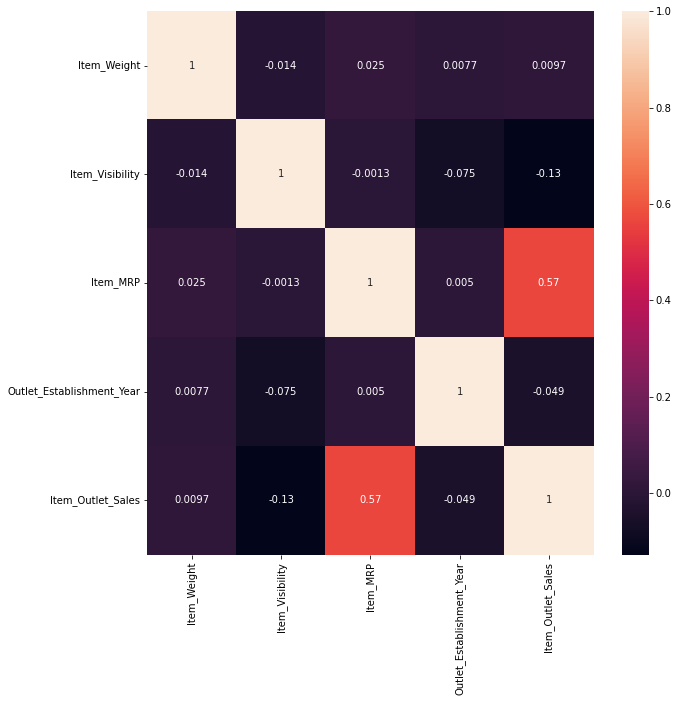

In [309]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [310]:
#since outlet size has more than 20% data missing,it is more suitable that we drop it.
df.drop('Outlet_Size',axis=1,inplace=True)

In [311]:
from sklearn.preprocessing import LabelEncoder

In [312]:
le=LabelEncoder()
list1=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [313]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,4,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,8,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,4,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,3,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1,2,1,994.7052


In [314]:
#removing item and outlet identifier from the dataframe
df.drop('Item_Identifier',axis=1,inplace=True)
df.drop('Outlet_Identifier',axis=1,inplace=True)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,4,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,8,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,4,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,2,1,994.7052


EXPLORATORY DATA ANALYSIS

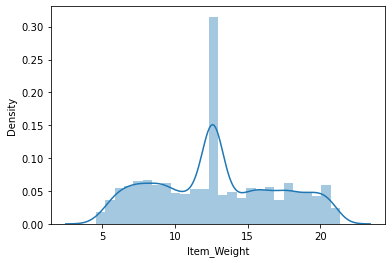

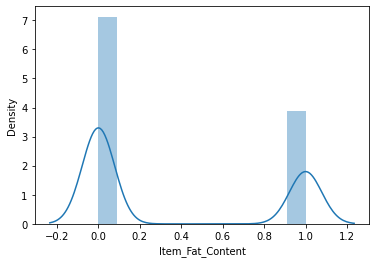

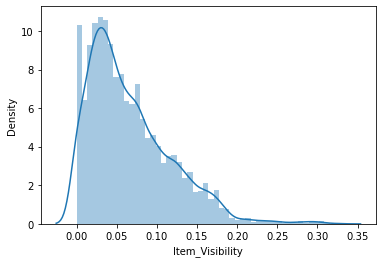

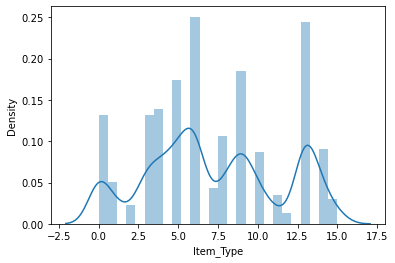

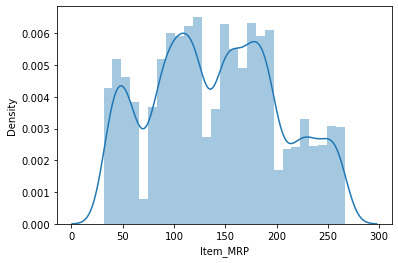

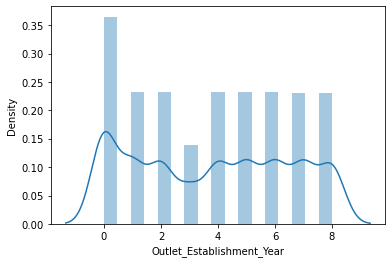

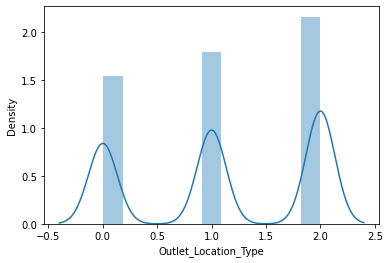

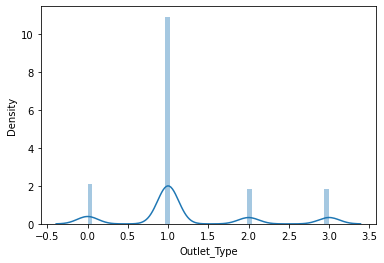

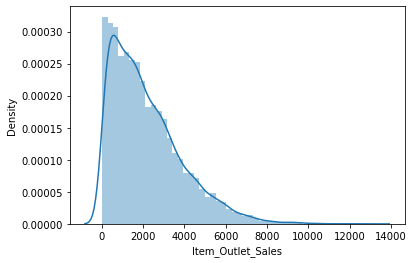

In [315]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

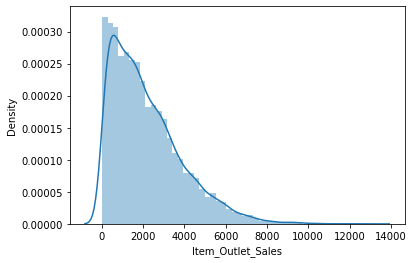

In [316]:
sns.distplot(df[i])

In [338]:
df.skew()

Item_Weight                  0.121845
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year    0.034270
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            0.234676
dtype: float64

In [317]:
#normalising item_outlet sales skewness
from scipy.stats import boxcox
df['Item_Outlet_Sales']=boxcox(df['Item_Outlet_Sales'],0.5)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

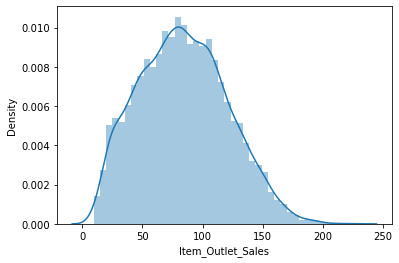

In [318]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

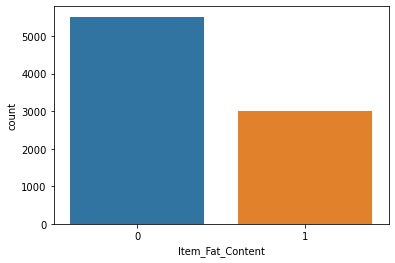

In [319]:
sns.countplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

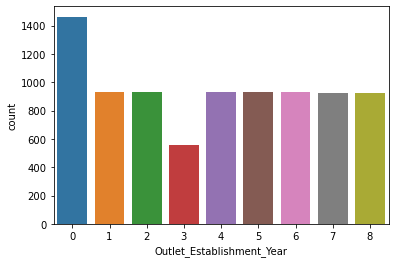

In [320]:
sns.countplot(df['Outlet_Establishment_Year'])

In [321]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [322]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [323]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7,random_state=42)

In [324]:
def train(model,x,y):
    #splitting
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7,random_state=101)
    #training
    model.fit(x,y)
    #predict
    pred=model.predict(x)
    #perform cross_val
    cv_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
    print("model report: ")
    
    print("mean_squared_error: ",mean_squared_error(y,pred))
    print("cv score: ",cv_score)
    

In [325]:
x_train.shape

(5966, 8)

In [326]:
y_train.shape

(5966,)

In [327]:
x_test.shape

(2557, 8)

In [328]:
y_test.shape

(2557,)

model report: 
mean_squared_error:  610.2843928884913
cv score:  [-618.03234813 -586.73832506 -601.94389849 -620.68734086 -630.44804209]


<AxesSubplot:title={'center':'model coefficients'}>

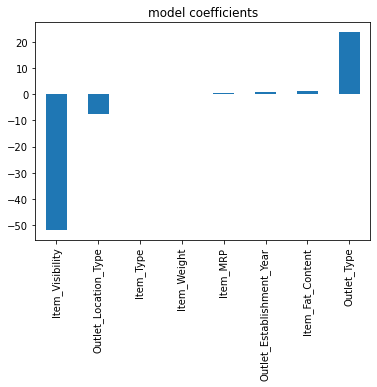

In [329]:
model=LinearRegression(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='model coefficients')


model report: 
mean_squared_error:  809.5753334578595
cv score:  [-842.22443574 -802.76381098 -765.15758278 -811.31235058 -830.42969441]


<AxesSubplot:title={'center':'model coefficients'}>

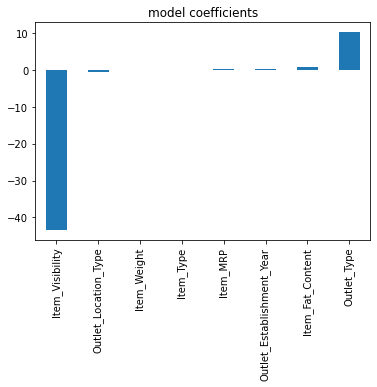

In [332]:
model=Ridge(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='model coefficients')


model report: 
mean_squared_error:  623.4348506133034
cv score:  [-632.729382   -605.89124809 -612.74550639 -625.62461786 -644.93329944]


<AxesSubplot:title={'center':'model coefficients'}>

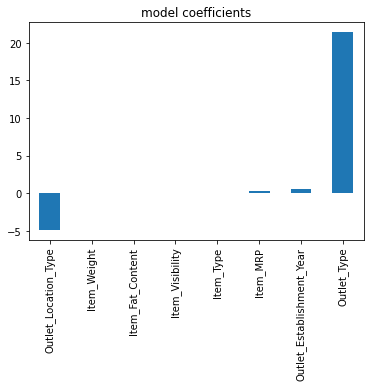

In [334]:
model=Lasso()
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='model coefficients')


model report: 
mean_squared_error:  69.0477317708776
cv score:  [-503.72001075 -507.63868822 -501.13892113 -498.34449182 -489.5298126 ]


<AxesSubplot:title={'center':'features importance'}>

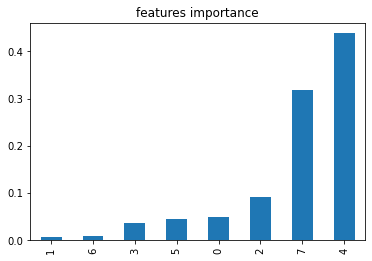

In [339]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_).sort_values()
coef.plot(kind='bar',title='features importance')


model report: 
mean_squared_error:  4.4427224510863036e-33
cv score:  [-963.6726157  -888.64950007 -919.07060793 -899.3226025  -874.77683633]


<AxesSubplot:title={'center':'features importance'}>

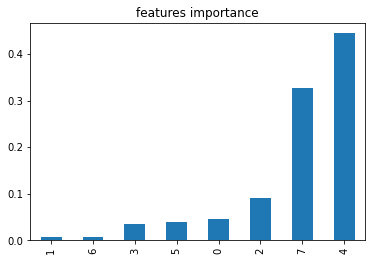

In [336]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_).sort_values()
coef.plot(kind='bar',title='features importance')


DECISION TREE REGRESSOR PERFORMED THE BEST

model report: 
mean_squared_error:  68.54933659412
cv score:  [-506.36321103 -505.63054873 -493.01061944 -494.33681137 -490.06557377]


<AxesSubplot:title={'center':'features importance'}>

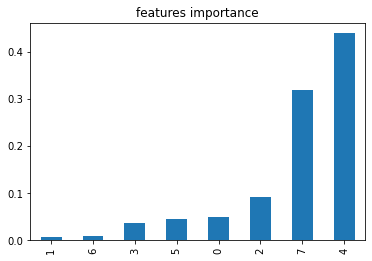

In [337]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_).sort_values()
coef.plot(kind='bar',title='features importance')
